In [1]:
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import pickle
import tqdm


In [64]:
data_base = "/mnt/nas2/FH/_connectomics/230906_updated_figures"
data_path = os.path.join(data_base, "clustering_list_JB.xlsx")

In [72]:
def read_excel(data_path):
    df = pd.read_excel(data_path,sheet_name="clustering_list")
    df_vnc = pd.read_excel(data_path,sheet_name="VNC_innervation")
    df_vnc = df_vnc.fillna(0)
    df_known = pd.read_excel(data_path,sheet_name="Known_DNs")
    df_studied = pd.read_excel(data_path,sheet_name="Studied_DNs")
    df_studied = df_studied.fillna(0)
    
    df = add_matched_dns_to_df(df, df_known)
    return df, df_vnc, df_known, df_studied


def add_matched_dns_to_df(df, df_known):
    for index, row in df_known.iterrows():
        dn_name = row["name"]
        dn_beh = row["phenotype class"]
        # print(dn_name, dn_beh)
        df.loc[df.name == dn_name, ("phenotype class")] = dn_beh
    return df

In [73]:
df, df_vnc, df_known, df_studied = read_excel(data_path)

In [41]:
df

,cluster nb in figure,cluster,name,count,phenotype class
0,1.0,0,DNde007,1,NaN
1,1.0,0,DNg10,1,anterior
2,1.0,0,DNg12,40,anterior
3,1.0,0,DNg17,2,NaN
4,1.0,0,DNg21,2,NaN
...,...,...,...,...,...
891,NaN,244,DNpe031,1,NaN
892,NaN,244,DNpe073,1,NaN
893,NaN,245,DNge046,1,NaN
894,NaN,246,DNpe087,1,NaN


In [44]:
df_vnc

,name,NTct,WTct,HTct,IntTct,LTct,T1,T2,T3,Ov,ANm,mVAC
0,DNc01,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
1,DNc02,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,DNd03,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0
3,DNx01,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,DNp11,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
94,DNp23,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
95,DNg29,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
96,DNp01,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
97,DNp04,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [45]:
df_known

,Unnamed: 0,name,phenotype class,detailed phenotype,reference,other remarks,reference.1
0,0,DNp10,landing,evoke landing-like extension of all six legs w...,State-dependent decoupling of sensory and moto...,NaN,NaN
1,1,DNp20,flight,optomotor response during flight corresponding...,An Array of Descending Visual Interneurons Enc...,"known as DNOVS1, very large axons (4.5um)",From Photons to Behaviors _Neural Implementati...
2,2,DNp05,takeoff,Putative role in long-mode takeoff from connec...,Transforming descending input into behavior_ T...,NaN,NaN
3,3,DNa01,walking,turning during walking,Imaging neural activity in the ventral nerve c...,steering,Neural circuit mechanisms for steering control...
4,4,DNp09,walking,ipsilateral turning during courtship,Two Brain Pathways Initiate Distinct Forward W...,also freezing,Speed dependent descending control of freezing...
5,5,MDN,walking,backwards walking,Neuronal Control of Drosophila Walking Directi...,NaN,NaN
6,6,DNg14,abdomen,abdomen dip,this work,NaN,NaN
7,7,DNp03,flight,"directly upstream of wing motor neurons, putat...",Transforming descending input into behavior_ T...,NaN,NaN
8,8,DNp04,takeoff,"long-mode takeoff, directional",Transforming descending input into behavior_ T...,directional escape when combined with DNp02,Synaptic gradients transform object location t...
9,9,DNg11,anterior,front leg rubbing,Descending neurons coordinate anterior groomin...,"targets only NTct, HTct, IntTct",NaN


In [46]:
df_studied

,name,1,2,3,4,5,6,7,8,9,10,11,12,n.c.,Unnamed: 14
0,DNp09,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
1,aDN2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,MDN,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
3,aDN1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,DNa01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
5,DNa02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0
6,DNb02,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0
7,DNg14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
8,mute,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,*DNge172


In [47]:
cluster_ids = [int(this_id) for this_id in np.unique(df["cluster nb in figure"] )if not np.isnan(this_id)]
n_cluster = len(cluster_ids)
cluster_ids

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]

In [48]:
behaviours = ["anterior", "takeoff", "landing", "walking", "flight"]  # , "turning"]
n_beh = len(behaviours)

In [51]:
def get_beh_for_cluster(df, i_cluster):
    cluster_df = df[df["cluster nb in figure"] == i_cluster]
    n_neurons = np.sum(cluster_df["count"].values)
    
    n_neurons_per_beh = np.zeros_like(behaviours, dtype=int)
    
    for i_beh, behaviour in enumerate(behaviours):
        beh_df = cluster_df[cluster_df["phenotype class"] == behaviour]
        n_neurons_per_beh[i_beh] = np.sum(beh_df["count"].values)
    return n_neurons_per_beh, np.sum(n_neurons_per_beh), n_neurons - np.sum(n_neurons_per_beh)


In [54]:

cluster_behaviour = np.zeros((n_cluster, n_beh))
cluster_behaviour_known = np.zeros((n_cluster))
cluster_behaviour_unknown = np.zeros((n_cluster))
for i, i_cluster in enumerate(cluster_ids):
    cluster_behaviour[i], cluster_behaviour_known[i], cluster_behaviour_unknown[i] = get_beh_for_cluster(df, i_cluster)
cluster_behaviour_norm = cluster_behaviour / np.repeat(cluster_behaviour_known[:,np.newaxis], repeats=n_beh, axis=-1)

/home/jbraun/anaconda3/envs/twop_df3d/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  


In [58]:
vnc_names = ['T1', 'T2', 'T3', 'LTct', 'IntTct', 'NTct', 'WTct', 'HTct', 'Ov', 'ANm', 'mVAC']  # df_vnc.columns.values[1:]
print(vnc_names)
n_vnc = len(vnc_names)

['T1', 'T2', 'T3', 'LTct', 'IntTct', 'NTct', 'WTct', 'HTct', 'Ov', 'ANm', 'mVAC']


In [59]:
def get_vnc_for_cluster(df, i_cluster):
    cluster_df = df[df["cluster nb in figure"] == i_cluster]
    n_neurons = np.sum(cluster_df["count"].values)
    
    n_neurons_per_vnc = np.zeros_like(vnc_names, dtype=int)
    n_neurons_unknown = 0
    
    for index, row in cluster_df.iterrows():
        n = row["count"]
        name = row["name"]
        if not np.sum(df_vnc["name"]==name):
            n_neurons_unknown += n
            continue
        # print("found", name)
        neuron_df = df_vnc[df_vnc["name"] == name]
        for i_vnc, vnc_name in enumerate(vnc_names):
            if neuron_df[vnc_name].values[0]:
                n_neurons_per_vnc[i_vnc] += n
        
            
    n_neurons_known = n_neurons - n_neurons_unknown
    
    return n_neurons_per_vnc, n_neurons_known, n_neurons_unknown

In [61]:
cluster_vnc = np.zeros((n_cluster, n_vnc))
cluster_vnc_known = np.zeros((n_cluster))
cluster_vnc_unknown = np.zeros((n_cluster))

for i, i_cluster in enumerate(cluster_ids):
    cluster_vnc[i,:], cluster_vnc_known[i], cluster_vnc_unknown[i] = get_vnc_for_cluster(df,i_cluster)
cluster_vnc_norm = cluster_vnc / np.repeat(cluster_vnc_known[:,np.newaxis], repeats=n_vnc, axis=-1)

In [55]:
print(cluster_behaviour_known)
print(cluster_behaviour_unknown)

[45. 15. 14. 17.  0.  2.  1.  0. 16. 25.  0.  0.]
[ 75. 110. 191. 106.  88.  13.  30.  13. 107.  65.  31.  28.]


In [62]:
print(cluster_vnc_known)
print(cluster_vnc_unknown)

[50. 26. 51. 39. 13.  4.  7.  1. 37. 51.  7.  3.]
[ 70.  99. 154.  84.  75.  11.  24.  12.  86.  39.  24.  25.]


In [56]:
linewidth = 2
mpl.rcParams['axes.titlesize'] = 16
mpl.rcParams['axes.labelsize'] = 16
mpl.rcParams['axes.labelpad'] = 5

def make_nice_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_position(('outward', 2*linewidth))
    ax.spines['bottom'].set_position(('outward',2*linewidth))
    ax.tick_params(width=linewidth)
    ax.tick_params(length=2.5*linewidth)
    ax.tick_params(labelsize=16)
    ax.spines["left"].set_linewidth(linewidth)
    ax.spines["bottom"].set_linewidth(linewidth)
    ax.spines["top"].set_linewidth(0)
    ax.spines["right"].set_linewidth(0)

<IPython.core.display.Javascript object>


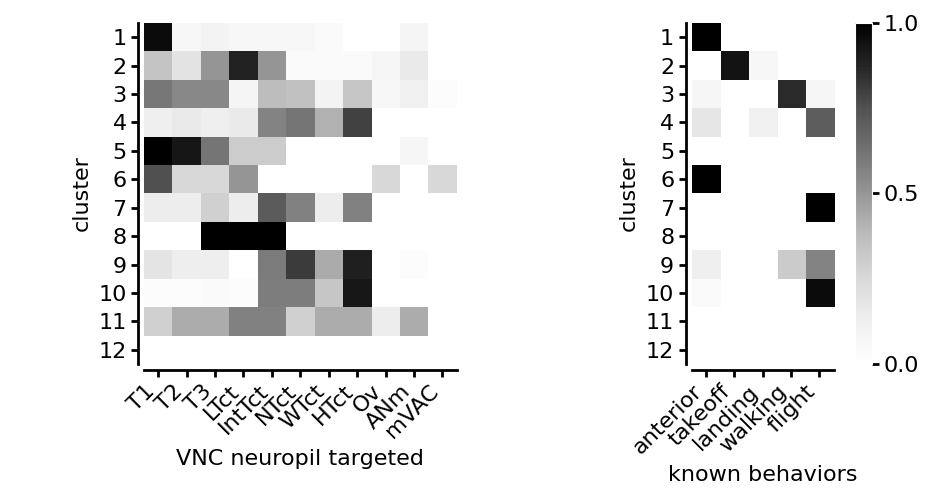

In [66]:
fig, axs = plt.subplots(1,2, figsize=(9.5,5))  # , sharey=True)
ax = axs[0]
im = ax.imshow(cluster_vnc_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_vnc))
ax.set_yticks(np.arange(n_cluster))
ax.set_yticklabels(cluster_ids)
make_nice_spines(ax)
ax.set_xticklabels(vnc_names, rotation=45, ha="right")
ax.set_xlabel("VNC neuropil targeted")
ax.set_ylabel("cluster")

ax = axs[1]
im = ax.imshow(cluster_behaviour_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_beh))
ax.set_yticks(np.arange(n_cluster))
ax.set_yticklabels(cluster_ids)
ax.set_xlabel("known behaviors")
ax.set_ylabel("cluster")
make_nice_spines(ax)
ax.set_xticklabels(behaviours, rotation=45, ha="right")

cbar = plt.colorbar(im, ax=ax, shrink=1, ticks=[0,0.5,1])
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

fig.savefig(os.path.join(data_base, "230906_clusters_vnc_behaviour.pdf"), dpi=300)

In [74]:
df_studied

,name,1,2,3,4,5,6,7,8,9,10,11,12,n.c.
0,DNp09,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,aDN2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MDN,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,aDN1,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DNa01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,DNa02,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6,DNb02,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
7,DNg14,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8,mute,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [75]:
names = df_studied.name.values
names

array(['DNp09', 'aDN2', 'MDN', 'aDN1', 'DNa01', 'DNa02', 'DNb02', 'DNg14',
       'mute'], dtype=object)

In [76]:
values = (df_studied.values[:,1:]).astype(float)  # [:,-1:0:-1]
values

array([[0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 3., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [77]:
values_norm = values / np.repeat(np.sum(values, axis=1, keepdims=True), 13, axis=1)
values_norm

array([[0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  ,
        0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ,
        0.  , 0.  ],
       [1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.75, 0.  , 0.  , 0.  , 0.  , 0.  , 0.25, 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.5 , 0.  , 0.  ,
        0.  , 0.  ],
       [0.  , 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.5 ],
       [0.5 , 0.5 , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
        0.  , 0.  ]])

<IPython.core.display.Javascript object>


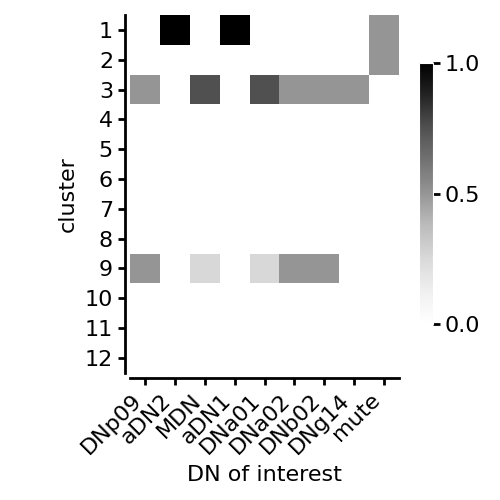

In [80]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(5,5))
im = ax.imshow(values_norm[:,:-1].T, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(n_cluster))
ax.set_yticklabels(cluster_ids)
make_nice_spines(ax)
ax.set_xticklabels(names, rotation=45, ha="right")
ax.set_xlabel("DN of interest")
ax.set_ylabel("cluster")
cbar = plt.colorbar(im, ax=ax, shrink=0.73, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

fig.savefig(os.path.join(data_base, "230829_clusters_known_DNs.pdf"), dpi=300)

# verifying 2nd type of clustering

In [30]:
data_path = "/mnt/nas2/FH/_connectomics/230830_louvain_glut_positive/clustering_list_glu_positive_JB.xlsx"

In [31]:
df_glut = pd.read_excel(data_path,skiprows=6)
df_glut[:20]

,cluster nb in figure,cluster,name,count,phenotype class,phenotype,Unnamed: 6,Unnamed: 7
0,1.0,0,DNa05,2,NaN,NaN,NaN,NaN
1,1.0,0,DNa07,1,NaN,NaN,NaN,NaN
2,1.0,0,DNa08,1,NaN,NaN,NaN,NaN
3,1.0,0,DNa09,2,NaN,NaN,NaN,NaN
4,1.0,0,DNa10,2,NaN,NaN,NaN,NaN
5,1.0,0,DNae004,2,NaN,NaN,NaN,NaN
6,1.0,0,DNae005,2,NaN,NaN,NaN,NaN
7,1.0,0,DNae008,1,NaN,NaN,NaN,NaN
8,1.0,0,DNae011,2,NaN,NaN,NaN,NaN
9,1.0,0,DNae012,2,NaN,NaN,NaN,NaN


In [32]:
np.unique(df_glut["cluster nb in figure"])

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., nan])

In [33]:
df

,cluster nb in figure,cluster,name,count,count comment,phenotype class,phenotype,reference,Others,Reference,Unnamed: 10
0,0.0,0,DNde006,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0,DNde007,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,0,DNg10,1,NaN,anterior,anterior reaching movements,Optogenetic dissection of descending behaviora...,"""We did not observe fluorescence responses dur...",Imaging neural activity in the ventral nerve ...,NaN
3,0.0,0,DNg12,40,NaN,anterior,ventral head sweeps and leg rubbing,Descending neurons coordinate anterior groomin...,NaN,NaN,NaN
4,0.0,0,DNg17,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
902,11.0,245,DNpe055,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
903,11.0,245,DNpe062,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
904,11.0,245,DNpe068,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,11.0,245,DNpe075,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
def get_dn_beh_match(df):
    known_dns = []
    unique_names = list(set(df.name))
    for unique_name in unique_names:
        df_unique = df[df.name == unique_name]
        if not len(list(set(df_unique["phenotype class"]))):
            print(df_unique)
        else:
            known_dns.append({unique_name: df_unique["phenotype class"].values[0]})
    return known_dns

In [35]:
list(set(["a", "b", "a"]))

['a', 'b']

In [36]:
dn_beh_match = get_dn_beh_match(df)

In [37]:
dn_match = dn_beh_match[17]
dn_match

{'DNp05': 'takeoff'}

In [40]:
dn_beh_match_export = {}
for this_dict in dn_beh_match:
    dn_name = list(this_dict.keys())[0]
    if isinstance(this_dict[dn_name], str):
        dn_beh_match_export.update(this_dict)
dn_beh_match_export

{'DNp10': 'landing',
 'DNp20': 'flight',
 'DNp05': 'takeoff',
 'DNa01': 'walking',
 'DNp09': 'walking',
 'MDN': 'walking',
 'DNg14': 'abdomen',
 'DNp03': 'flight',
 'DNp04': 'takeoff',
 'DNg11': 'anterior',
 'DNg13': 'walking',
 'DNa05': 'flight',
 'DNg02': 'flight',
 'DNg07': 'flight',
 'DNp11': 'takeoff',
 'DNb02': 'walking',
 'DNg12': 'anterior',
 'DNg10': 'anterior',
 'aDN2': 'anterior',
 'DNa02': 'walking',
 'DNa04': 'flight',
 'DNp01': 'takeoff',
 'aDN1': 'anterior',
 'DNp02': 'takeoff',
 'DNa08': 'flight',
 'DNp06': 'takeoff',
 'DNp07': 'landing',
 'DNp35': 'takeoff',
 'DNp31': 'flight',
 'DNa10': 'flight'}

In [43]:
df_dn_match = pd.DataFrame(dn_beh_match_export.items())
df_dn_match

,0,1
0,DNp10,landing
1,DNp20,flight
2,DNp05,takeoff
3,DNa01,walking
4,DNp09,walking
5,MDN,walking
6,DNg14,abdomen
7,DNp03,flight
8,DNp04,takeoff
9,DNg11,anterior


In [44]:
df_dn_match.to_csv("/mnt/nas2/FH/_connectomics/230816_louvain/230906_known_DNs.csv")

In [62]:
dn_name = list(dn_match.keys())[0]
dn_name

'aDN1'

In [66]:
dn_match[dn_name]

'anterior'

In [80]:
df_glut.loc[df_glut.name == dn_name, ("phenotype class")] = dn_match[dn_name]

In [81]:
df_glut[df_glut.name == dn_name]["phenotype class"] 

252    anterior
Name: phenotype class, dtype: object

In [82]:
def add_matched_dns_to_df(df, dn_beh_match):
    for dn_match in dn_beh_match:
        dn_name = list(dn_match.keys())[0]
        df.loc[df.name == dn_name, ("phenotype class")] = dn_match[dn_name]
    return df

In [83]:
df_glut = add_matched_dns_to_df(df_glut, dn_beh_match)

In [84]:
set(df_glut["phenotype class"].values)

{'abdomen', 'anterior', 'flight', 'landing', nan, 'takeoff', 'walking'}

In [96]:
n_cluster_glut = 11
cluster_glut_behaviour = np.zeros((n_cluster_glut, n_beh))
cluster_glut_behaviour_known = np.zeros((n_cluster_glut))
cluster_glut_behaviour_unknown = np.zeros((n_cluster_glut))
for i_cluster in range(n_cluster_glut):
    cluster_glut_behaviour[i_cluster], cluster_glut_behaviour_known[i_cluster], cluster_glut_behaviour_unknown[i_cluster] = get_beh_for_cluster(df_glut, i_cluster+1)

In [97]:
print(cluster_behaviour_known)
print(cluster_behaviour_unknown)

[45. 15. 12. 17.  1.  0.  2.  0.  0. 16. 13. 11.]
[ 76. 110. 168. 109. 119.  40.  28.  22.  12. 100.  26.  33.]


In [98]:
print(cluster_glut_behaviour_known)
print(cluster_glut_behaviour_unknown)

[46. 11. 45. 14.  1.  9.  3.  3.  6.  0.  0.]
[169. 155.  77. 106. 141.  71.  75.  68.  31.  12.  38.]


In [99]:
cluster_glut_behaviour_norm = cluster_glut_behaviour / np.repeat(cluster_glut_behaviour_known[:,np.newaxis], repeats=n_beh, axis=-1)

/home/jbraun/anaconda3/envs/twop_df3d/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


<IPython.core.display.Javascript object>


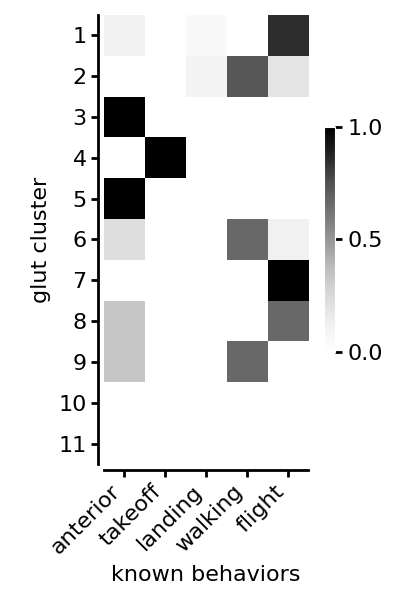

In [100]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(4,6))
im = ax.imshow(cluster_glut_behaviour_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_beh))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)

ax.set_xlabel("known behaviors")
ax.set_ylabel("glut cluster")
make_nice_spines(ax)
ax.set_xticklabels(behaviours, rotation=45, ha="right")

cbar = plt.colorbar(im, ax=ax, shrink=0.5, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

In [107]:
cluster_glut_vnc = np.zeros((n_cluster_glut, n_vnc))
cluster_glut_vnc_known = np.zeros((n_cluster_glut))
cluster_glut_vnc_unknown = np.zeros((n_cluster_glut))

for i_cluster in range(n_cluster_glut):
    cluster_glut_vnc[i_cluster,:], cluster_glut_vnc_known[i_cluster], cluster_glut_vnc_unknown[i_cluster] = get_vnc_for_cluster(df_glut, i_cluster+1)

In [108]:
cluster_glut_vnc_norm = cluster_glut_vnc / np.repeat(cluster_glut_vnc_known[:,np.newaxis], repeats=n_vnc, axis=-1)

/home/jbraun/anaconda3/envs/twop_df3d/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [109]:
print(cluster_vnc_known)
print(cluster_vnc_unknown)

[50. 26. 45. 39. 18. 13.  6.  0.  7. 36. 23. 20.]
[ 71.  99. 135.  87. 102.  27.  24.  22.   5.  80.  16.  24.]


In [110]:
print(cluster_glut_vnc_known)
print(cluster_glut_vnc_unknown)

[93. 41. 52. 26. 25. 21. 10. 17. 20.  0.  3.]
[122. 125.  70.  94. 117.  59.  68.  54.  17.  12.  35.]


<IPython.core.display.Javascript object>


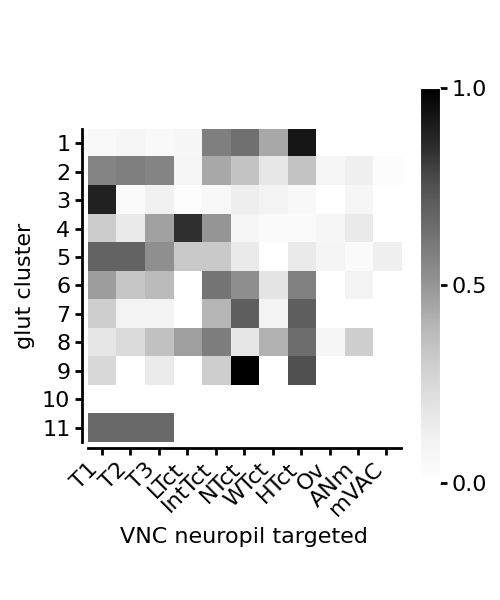

In [112]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(5,6))
im = ax.imshow(cluster_glut_vnc_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_vnc))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)

make_nice_spines(ax)
ax.set_xticklabels(vnc_names, rotation=45, ha="right")
ax.set_xlabel("VNC neuropil targeted")
ax.set_ylabel("glut cluster")
cbar = plt.colorbar(im, ax=ax, shrink=0.73, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

<IPython.core.display.Javascript object>


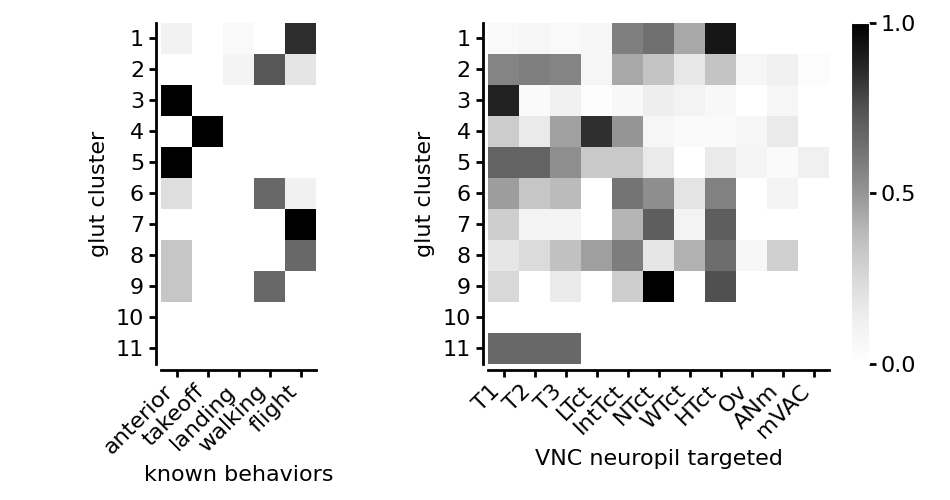

In [122]:
fig, axs = plt.subplots(1,2, figsize=(9.5,5))  # , sharey=True)
ax = axs[0]
im = ax.imshow(cluster_glut_behaviour_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_beh))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)
make_nice_spines(ax)
ax.set_xlabel("known behaviors")
ax.set_xticklabels(behaviours, rotation=45, ha="right")
ax.set_ylabel("glut cluster")

ax = axs[1]
im = ax.imshow(cluster_glut_vnc_norm, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(n_vnc))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)
make_nice_spines(ax)
ax.set_xticklabels(vnc_names, rotation=45, ha="right")
ax.set_xlabel("VNC neuropil targeted")
ax.set_ylabel("glut cluster")

cbar = plt.colorbar(im, ax=ax, shrink=1, ticks=[0,0.5,1])
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

out_dir = "/mnt/nas2/FH/_connectomics/230830_louvain_glut_positive"
fig.savefig(os.path.join(out_dir, "230905_clusters_vnc_behaviour.pdf"), dpi=300)

In [116]:
df_studied_glut = pd.read_excel(data_path,sheet_name="Studied_DNs", )
df_studied_glut = df_studied_glut.fillna(0)
df_studied_glut

,name,1,2,3,4,5,6,7,8,9,10,11,n.c.
0,DNp09,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,aDN2,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,MDN,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,aDN1,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,DNa01,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,DNa02,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
6,DNb02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
7,DNg14,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,mute,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [117]:
values_glut = (df_studied_glut.values[:,1:]).astype(float)  # [:,-1:0:-1]
values_glut

array([[0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 2., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 4., 0., 0., 0.],
       [0., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1.]])

In [119]:
values_glut_norm = values_glut / np.repeat(np.sum(values_glut, axis=1, keepdims=True), 12, axis=1)
values_glut_norm

array([[0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.5, 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 1. , 0. , 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.5, 0. , 0. , 0. , 0.5]])

<IPython.core.display.Javascript object>


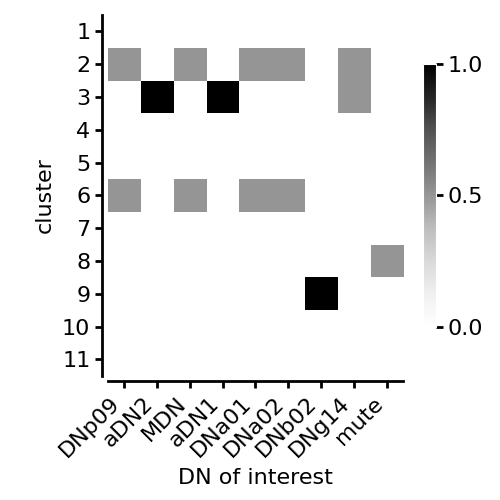

In [123]:
%matplotlib notebook
fig, ax = plt.subplots(1,1, figsize=(5,5))
im = ax.imshow(values_glut_norm[:,:-1].T, cmap=plt.cm.get_cmap("Greys"), clim=[0,1])
ax.set_xticks(np.arange(len(names)))
ax.set_yticks(np.arange(n_cluster_glut))
ax.set_yticklabels(np.arange(n_cluster_glut)+1)
make_nice_spines(ax)
ax.set_xticklabels(names, rotation=45, ha="right")
ax.set_xlabel("DN of interest")
ax.set_ylabel("cluster")
cbar = plt.colorbar(im, ax=ax, shrink=0.73, ticks=[0,0.5,1])
cbar.outline.set_edgecolor('#ffffff')
make_nice_spines(cbar.ax)
cbar.outline.set_edgecolor('#ffffff')
# ax.axis("off")
fig.tight_layout()

out_dir = "/mnt/nas2/FH/_connectomics/230830_louvain_glut_positive"
fig.savefig(os.path.join(out_dir, "230905_clusters_known_DNs.pdf"), dpi=300)